# 개발언어 사용자 분석을 통한 업계 트렌드 파악

어떤 언어를 사용하는 개발자의 연봉이 가장 높은지 알아보고자 함

# 데이터 수집
[stackoverflow에서 진행된 개발자 설문조사 데이터 2024](https://survey.stackoverflow.co/)를 이용


제공된 파일들
- `2024 Developer Survey.pdf` 실제 설문지
- `survey_results_public.csv` 설문 조사 결과
- `survey_results_schema.csv` 각 설문 질문이 어떤 column 이름에 매칭되는지에 대한 정보 


## 설문지에서 분석에 사용될만한 질문을 가려냄

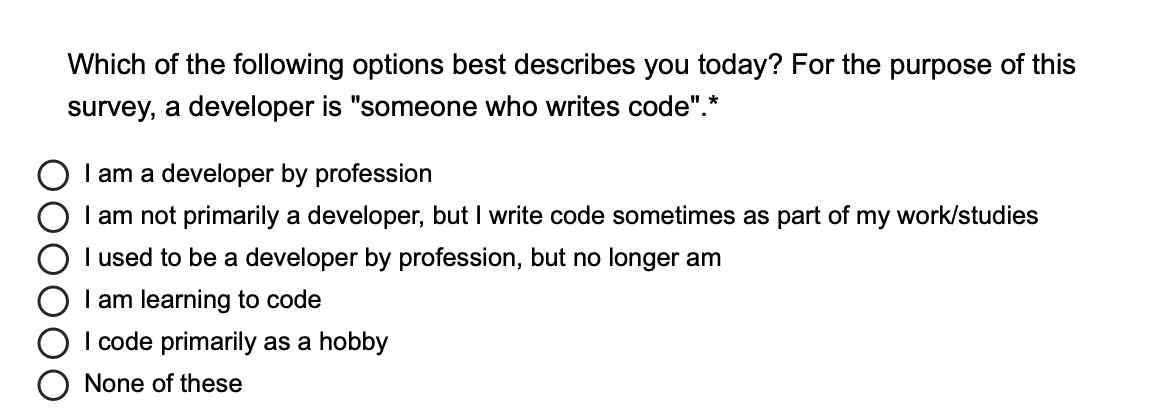
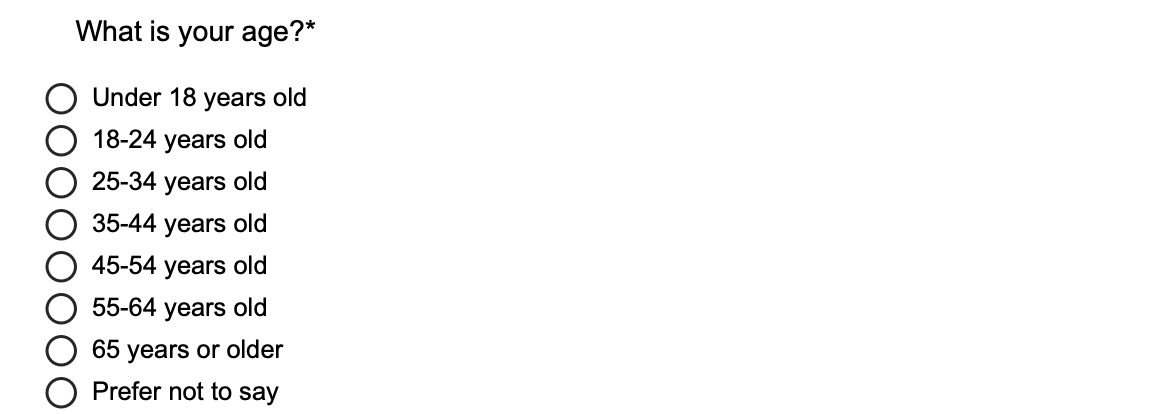
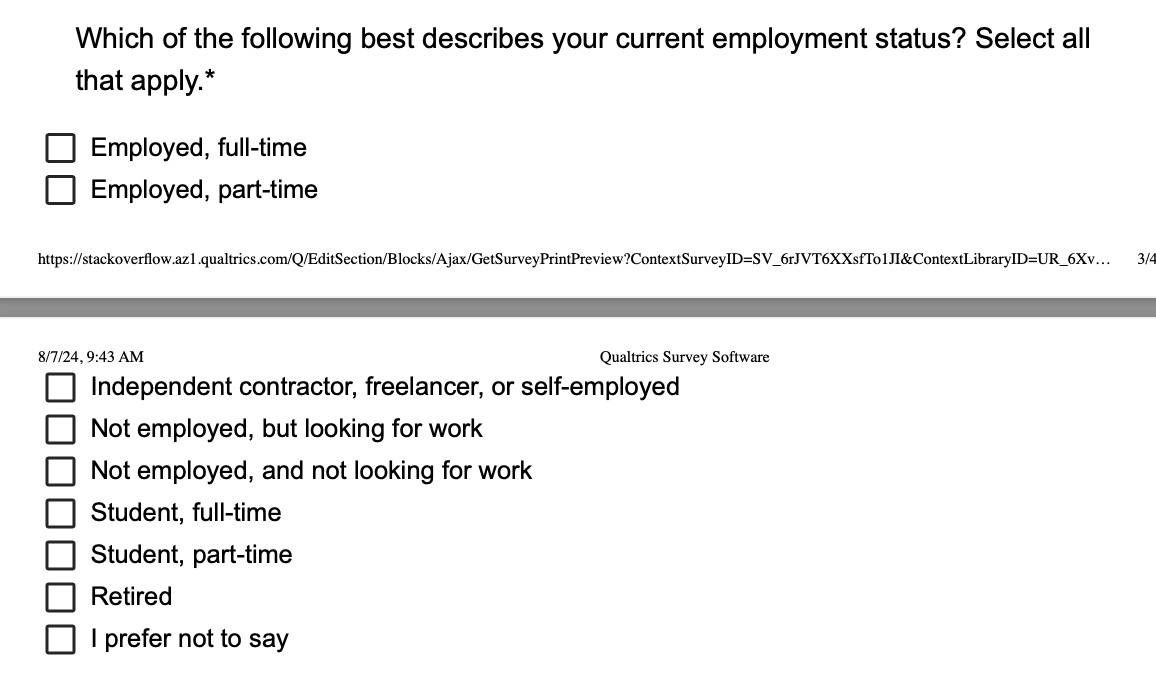
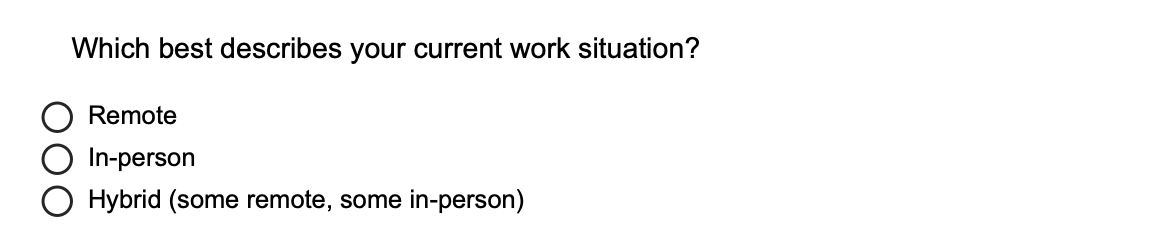
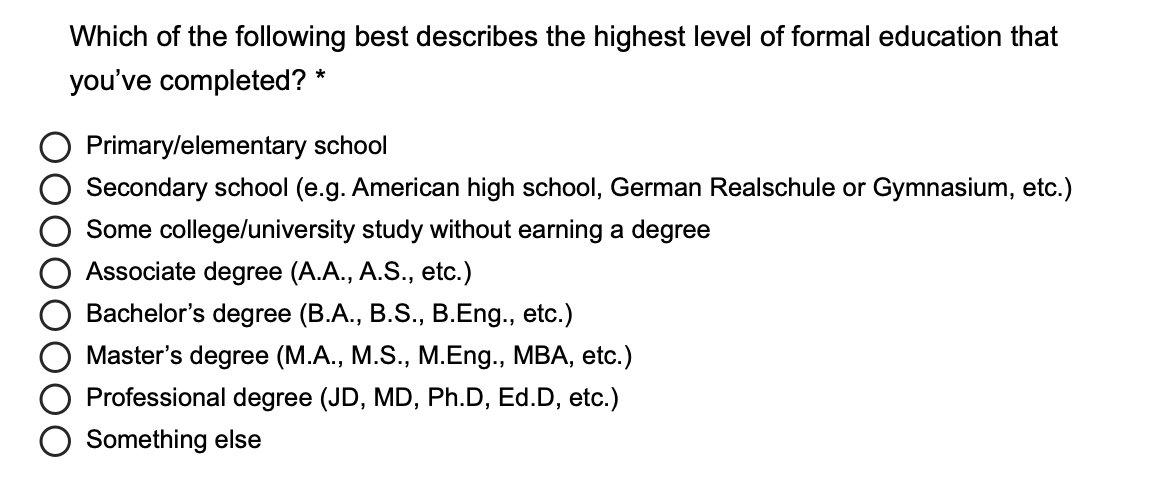
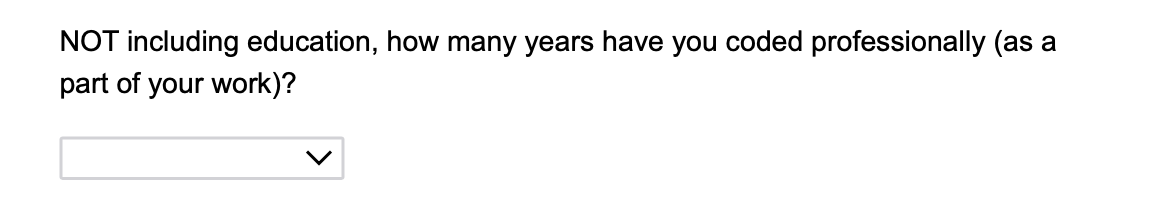
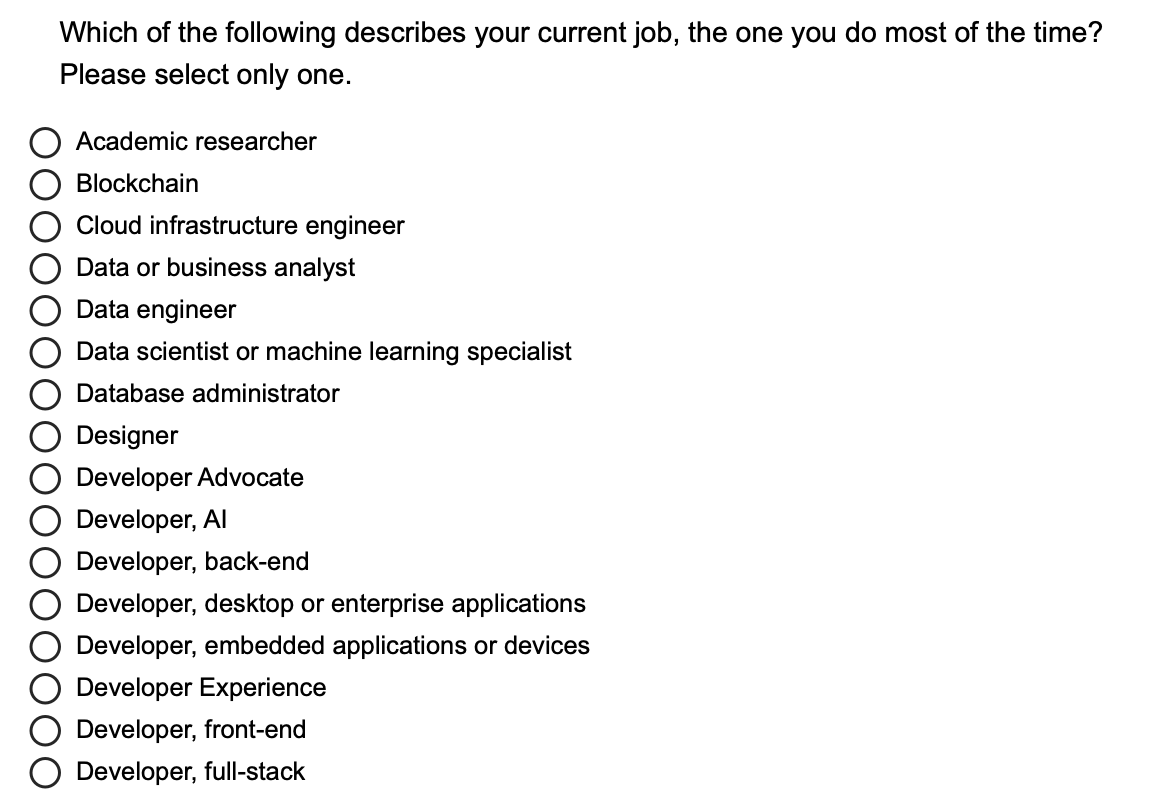
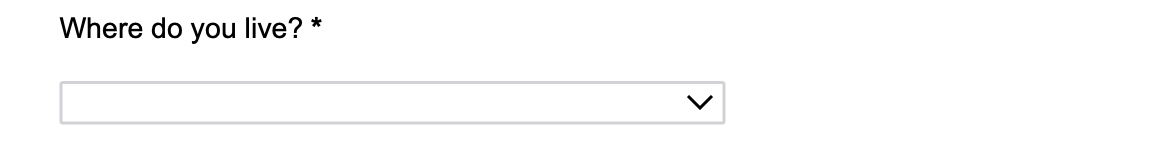
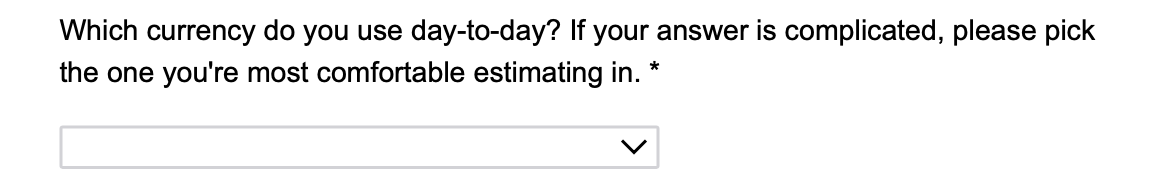
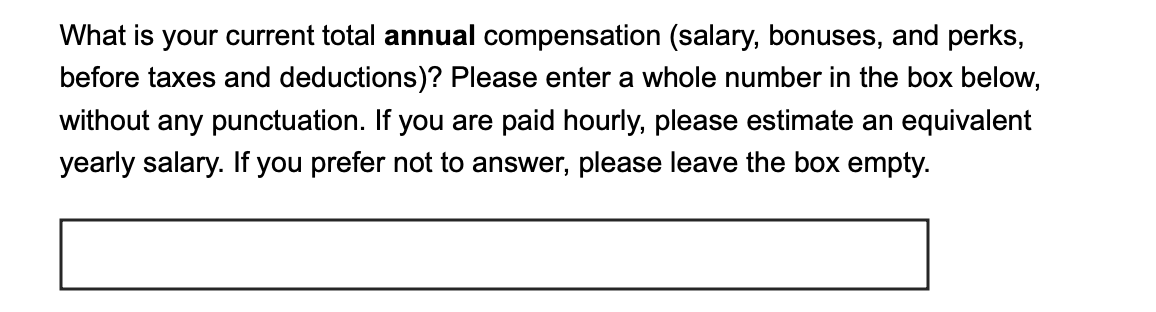
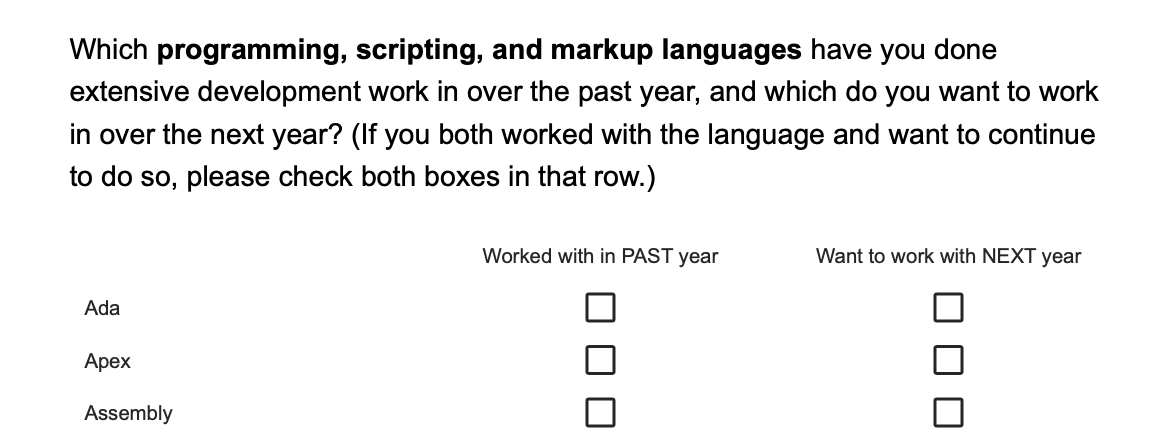
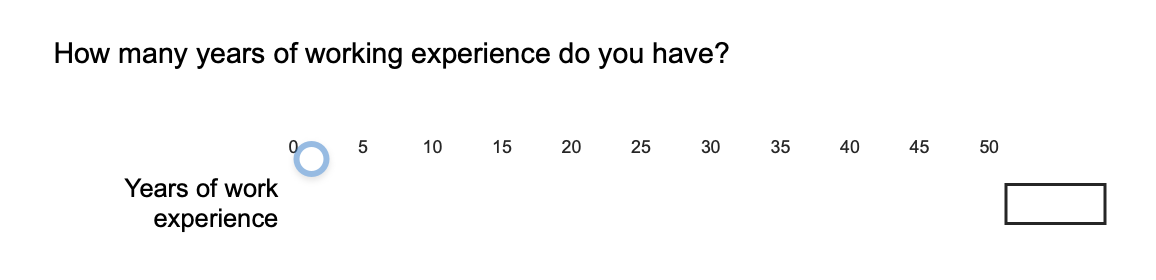
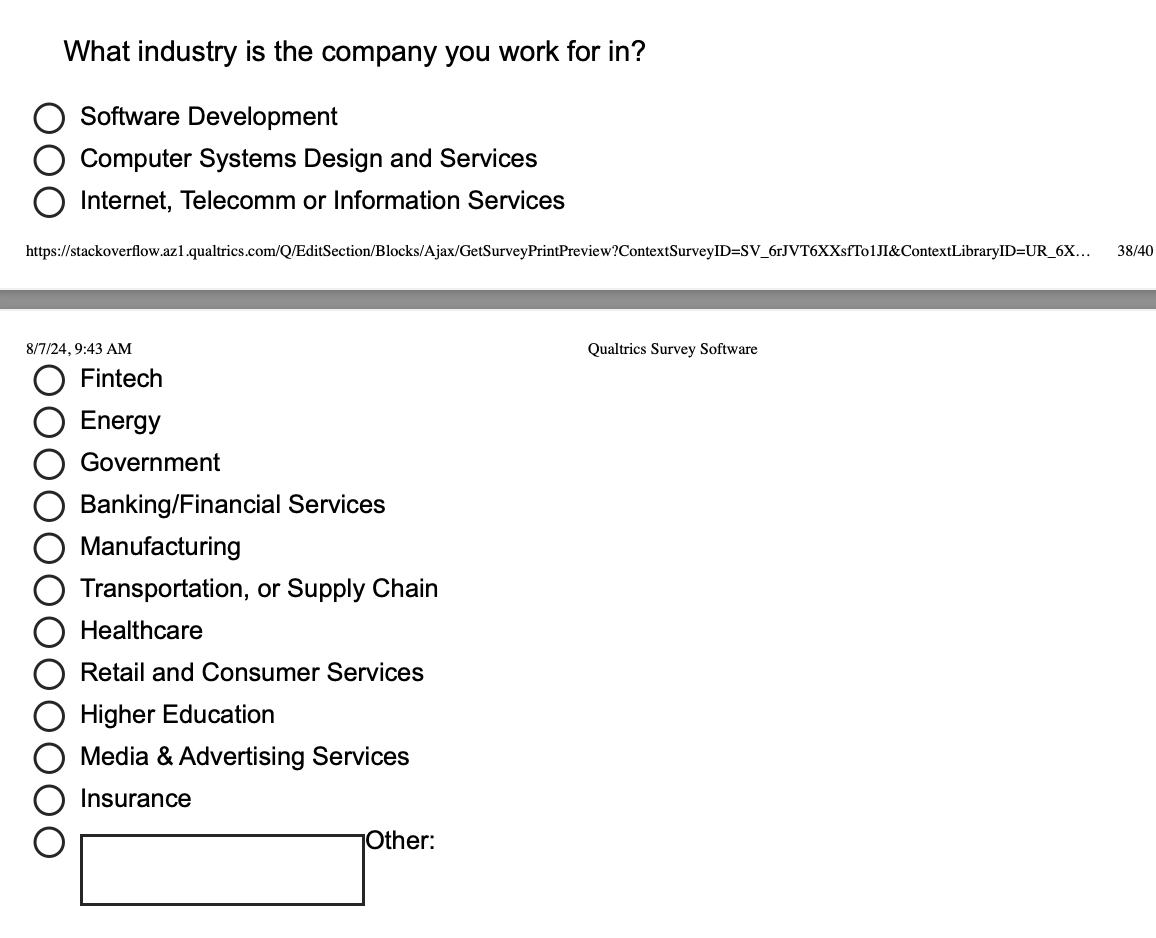




# Imports

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

# Functions & Variables

## DATA_DEVS

In [304]:
DATA_DEVS = ['Data or business analyst', 'Data scientist or machine learning specialist', 'Data engineer']

## get_flattened_list(), get_unique_values() 함수

`Employment`, `Language` 컬럼에서 중복 선택이 세미콜론(;)으로 겹쳐져 나옴.  <br>
여러 중복 선택을 flatten list로 변경하는 로직을 함수로 만들어서 후에 편하게 사용하려고 함

In [209]:
def get_flattened_list(nested_series):
    split_lists = nested_series.dropna().str.split(';')
    return [val for sublist in split_lists for val in sublist]

def get_unique_values(nested_series):
    flatten_list = get_flattened_list(nested_series)
    unique_values = set(flatten_list)
    return list(unique_values)

# 데이터 불러오기

In [210]:
file_path = './data/survey_results_public.csv'
raw_data = pd.read_csv(file_path)
raw_data # 65437 rows × 114 columns

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,NaN,NaN,NaN,NaN


In [211]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


## 가려낸 질문만 뽑아내기

In [212]:
columns = ["ResponseId",
"MainBranch", # "developer 인가?"
"Age", # 나이
"Employment", # 고용상태
"RemoteWork", # 재택 근무 여부
"EdLevel", # 최종 학력
"YearsCodePro", # 코딩 경력
"DevType", # 직업 종류
"Country", # 거주 국가
"Currency", # 통화
"CompTotal", # 연봉
"LanguageHaveWorkedWith", # 사용하는 개발언어
"LanguageWantToWorkWith", # 사용을 원하는 개발언어
"WorkExp", # 업무 경력
"Industry" # 산업군
]

In [213]:
filtered_raw = raw_data[columns]

In [214]:
filtered_data = pd.read_csv(file_path, usecols=columns)
filtered_data.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Primary/elementary school,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,17.00000,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,Developer Experience,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Some college/university study without earning ...,NaN,"Developer, full-stack",Canada,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,"Secondary school (e.g. American high school, G...",NaN,"Developer, full-stack",Norway,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,NaN,NaN


# 데이터 전처리

In [215]:
df = filtered_raw.copy()
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Primary/elementary school,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,17.00000,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,Developer Experience,United Kingdom of Great Britain and Northern I...,NaN,NaN,C#,C#,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Some college/university study without earning ...,NaN,"Developer, full-stack",Canada,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,"Secondary school (e.g. American high school, G...",NaN,"Developer, full-stack",Norway,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,NaN,NaN


In [216]:
df.tail()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,Blockchain,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,"Developer, mobile",NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",2,"Developer, back-end",Germany,EUR European Euro,NaN,C;C++;Go;Lua;Objective-C;Python;Rust;SQL,Rust;SQL,5.00000,NaN
65436,65437,I code primarily as a hobby,18-24 years old,"Student, full-time",NaN,NaN,NaN,NaN,NaN,NaN,NaN,C;HTML/CSS;Java;JavaScript;PHP;Python;TypeScript,JavaScript;Python;TypeScript,NaN,NaN


#### info() - null 값이 많이 보임

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              65437 non-null  int64  
 1   MainBranch              65437 non-null  object 
 2   Age                     65437 non-null  object 
 3   Employment              65437 non-null  object 
 4   RemoteWork              54806 non-null  object 
 5   EdLevel                 60784 non-null  object 
 6   YearsCodePro            51610 non-null  object 
 7   DevType                 59445 non-null  object 
 8   Country                 58930 non-null  object 
 9   Currency                46684 non-null  object 
 10  CompTotal               33740 non-null  float64
 11  LanguageHaveWorkedWith  59745 non-null  object 
 12  LanguageWantToWorkWith  55752 non-null  object 
 13  WorkExp                 29658 non-null  float64
 14  Industry                28858 non-null

#### describe() - 숫자 컬럼의 통계 확인

In [218]:
df.describe()

,ResponseId,CompTotal,WorkExp
count,"65,437.00000","33,740.00000","29,658.00000"
mean,"32,719.00000","29,638,411,381,149,976,434,844,996,221,255,135,...",11.46696
std,"18,890.17912","5,444,117,135,144,528,055,076,090,388,763,822,7...",9.16871
min,1.00000,0.00000,0.00000
25%,"16,360.00000","60,000.00000",4.00000
50%,"32,719.00000","110,000.00000",9.00000
75%,"49,078.00000","250,000.00000",16.00000
max,"65,437.00000","1,000,000,000,000,000,162,545,277,246,339,097,2...",50.00000


In [219]:
# `CompTotal`의 크기가 너무 커서 보기 어렵게 결과가 나옴. 이를 수정
pd.set_option('display.float_format', '{:,.2f}'.format)

In [220]:
# `CompTotal`의 mean, std 값이 이상함. 아마도 max 값이 이상하게 되어있는 듯
df.describe()

,ResponseId,CompTotal,WorkExp
count,"65,437.00","33,740.00","29,658.00"
mean,"32,719.00","29,638,411,381,149,976,434,844,996,221,255,135,...",11.47
std,"18,890.18","5,444,117,135,144,528,055,076,090,388,763,822,7...",9.17
min,1.00,0.00,0.00
25%,"16,360.00","60,000.00",4.00
50%,"32,719.00","110,000.00",9.00
75%,"49,078.00","250,000.00",16.00
max,"65,437.00","1,000,000,000,000,000,162,545,277,246,339,097,2...",50.00


#### describe() - 문자열 컬럼의 통계 확인

In [221]:
df.describe(include=object)

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,Industry
count,65437,65437,65437,54806,60784,51610,59445,58930,46684,59745,55752,28858
unique,5,8,110,3,8,52,34,185,142,23864,22769,15
top,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Developer, full-stack",United States of America,EUR European Euro,HTML/CSS;JavaScript;TypeScript,Python,Software Development
freq,50207,23911,39041,23015,24942,4168,18260,11095,12730,1002,922,11918


In [222]:
# 보기가 힘들어 transpose 해서 봄
df.describe(include=object).T

,count,unique,top,freq
MainBranch,65437,5,I am a developer by profession,50207
Age,65437,8,25-34 years old,23911
Employment,65437,110,"Employed, full-time",39041
RemoteWork,54806,3,"Hybrid (some remote, some in-person)",23015
EdLevel,60784,8,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",24942
YearsCodePro,51610,52,2,4168
DevType,59445,34,"Developer, full-stack",18260
Country,58930,185,United States of America,11095
Currency,46684,142,EUR European Euro,12730
LanguageHaveWorkedWith,59745,23864,HTML/CSS;JavaScript;TypeScript,1002


## MainBranch

In [223]:
df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I am learning to code                                                                     3875
I code primarily as a hobby                                                               3334
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

### target branch 정의

이 분석의 목적은 어떤 언어를 사용하는 개발자의 연봉이 가장 높은지 알기위함. 
이에 따라 `MainBranch` 컬럼에서
- 지금 개발자(I am a developer by profession)
- 개발자는 아니지만, 업무나 연구의 일부로 개발을 함(I am not primarily a developer, but I write code sometimes as part of my work/studies)
- 개발자였던(I used to be a developer by profession, but no longer am)

의 데이터만 사용하기로 함

In [224]:
PRO_DEV = 'I am a developer by profession'
SEMI_DEV = 'I am not primarily a developer, but I write code sometimes as part of my work/studies'
EX_DEV = 'I used to be a developer by profession, but no longer am'
targetBranch = [PRO_DEV, SEMI_DEV, EX_DEV]

In [225]:
devs_df = df[df['MainBranch'].isin(targetBranch)]
devs_df['MainBranch'].value_counts()

MainBranch
I am a developer by profession                                                           50207
I am not primarily a developer, but I write code sometimes as part of my work/studies     6511
I used to be a developer by profession, but no longer am                                  1510
Name: count, dtype: int64

In [226]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58228 entries, 0 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              58228 non-null  int64  
 1   MainBranch              58228 non-null  object 
 2   Age                     58228 non-null  object 
 3   Employment              58228 non-null  object 
 4   RemoteWork              52998 non-null  object 
 5   EdLevel                 54413 non-null  object 
 6   YearsCodePro            51610 non-null  object 
 7   DevType                 53453 non-null  object 
 8   Country                 52675 non-null  object 
 9   Currency                46684 non-null  object 
 10  CompTotal               33740 non-null  float64
 11  LanguageHaveWorkedWith  53532 non-null  object 
 12  LanguageWantToWorkWith  49917 non-null  object 
 13  WorkExp                 29400 non-null  float64
 14  Industry                28611 non-null  obj

## Age

In [227]:
display(df['Age'].value_counts(normalize=True))
display(devs_df['Age'].value_counts(normalize=True))

Age
25-34 years old      0.37
35-44 years old      0.23
18-24 years old      0.22
45-54 years old      0.10
55-64 years old      0.04
Under 18 years old   0.04
65 years or older    0.01
Prefer not to say    0.00
Name: proportion, dtype: float64

Age
25-34 years old      0.40
35-44 years old      0.25
18-24 years old      0.19
45-54 years old      0.10
55-64 years old      0.04
65 years or older    0.01
Under 18 years old   0.01
Prefer not to say    0.00
Name: proportion, dtype: float64

## Employment
고용상태

In [228]:
devs_df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                   38386
Independent contractor, freelancer, or self-employed                                                                   4570
Employed, full-time;Independent contractor, freelancer, or self-employed                                               3521
Student, full-time                                                                                                     1894
Not employed, but looking for work                                                                                     1647
                                                                                                                      ...  
Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time;Retired                       1
Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time          

다중 선택이 가능한 항목이었던 걸로 보여짐

In [229]:
devs_df['Employment'].hasnans

False

In [230]:
devs_df['Employment'].describe()

count                   58228
unique                    103
top       Employed, full-time
freq                    38386
Name: Employment, dtype: object

In [231]:
flatten_employment_list = get_flattened_list(devs_df['Employment'])
flatten_employment_list

unique_values = get_unique_values(devs_df['Employment'])
unique_values

['Employed, full-time',
 'Student, full-time',
 'Employed, part-time',
 'I prefer not to say',
 'Not employed, but looking for work',
 'Not employed, and not looking for work',
 'Independent contractor, freelancer, or self-employed',
 'Retired',
 'Student, part-time']

In [232]:
pd.Series(flatten_employment_list).value_counts()

Employed, full-time                                     44351
Independent contractor, freelancer, or self-employed    10061
Student, full-time                                       4733
Employed, part-time                                      3691
Not employed, but looking for work                       2661
Student, part-time                                       2058
Not employed, and not looking for work                    495
Retired                                                   489
I prefer not to say                                       255
Name: count, dtype: int64

`MainBranch` 에서 SEMI_DEV 를 선택한 학생들이 많은 것 같음 <br>
이 분석에서는 돈을 버는 실무자들의 데이터가 필요하기에 
- "Employed, full-time"
- "Independent contractor, freelancer, or self-employed"
- "Employed, part-time"

의 데이터를 제외하고는 불필요해 보임

In [233]:
employment_condition1 = devs_df['Employment'].str.contains("Employed, full-time")
employment_condition2 = devs_df['Employment'].str.contains("Independent contractor, freelancer, or self-employed")
employment_condition3 = devs_df['Employment'].str.contains("Employed, part-time")

In [234]:
devs_df = devs_df[employment_condition1|employment_condition2|employment_condition3]

In [235]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53028 entries, 0 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              53028 non-null  int64  
 1   MainBranch              53028 non-null  object 
 2   Age                     53028 non-null  object 
 3   Employment              53028 non-null  object 
 4   RemoteWork              52998 non-null  object 
 5   EdLevel                 49627 non-null  object 
 6   YearsCodePro            47838 non-null  object 
 7   DevType                 48876 non-null  object 
 8   Country                 47963 non-null  object 
 9   Currency                46666 non-null  object 
 10  CompTotal               33738 non-null  float64
 11  LanguageHaveWorkedWith  48803 non-null  object 
 12  LanguageWantToWorkWith  45522 non-null  object 
 13  WorkExp                 29399 non-null  float64
 14  Industry                28610 non-null  obj

## RemoteWork

In [236]:
devs_df['RemoteWork'].value_counts(normalize=True, dropna=False)

RemoteWork
Hybrid (some remote, some in-person)   0.42
Remote                                 0.38
In-person                              0.19
NaN                                    0.00
Name: proportion, dtype: float64

In [237]:
devs_df = devs_df.dropna(subset='RemoteWork')
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52998 entries, 0 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              52998 non-null  int64  
 1   MainBranch              52998 non-null  object 
 2   Age                     52998 non-null  object 
 3   Employment              52998 non-null  object 
 4   RemoteWork              52998 non-null  object 
 5   EdLevel                 49604 non-null  object 
 6   YearsCodePro            47817 non-null  object 
 7   DevType                 48854 non-null  object 
 8   Country                 47941 non-null  object 
 9   Currency                46644 non-null  object 
 10  CompTotal               33727 non-null  float64
 11  LanguageHaveWorkedWith  48782 non-null  object 
 12  LanguageWantToWorkWith  45501 non-null  object 
 13  WorkExp                 29390 non-null  float64
 14  Industry                28602 non-null  obj

## EdLevel
최종학력

In [238]:
devs_df['EdLevel'].value_counts(dropna=False)

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          21840
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       14384
Some college/university study without earning a degree                                 5736
NaN                                                                                    3394
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     2693
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2635
Associate degree (A.A., A.S., etc.)                                                    1475
Something else                                                                          540
Primary/elementary school                                                               301
Name: count, dtype: int64

학사 졸업이 가장 많고 그 다음으로 석사 졸업이 많음

## YearsCodePro
코딩 경력

In [239]:
devs_df['YearsCodePro'].unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '16', '8', '14',
       '4', '45', '1', '24', '2', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '31', '19', '21', '28', '34', '32', '22', '40', '50',
       '39', '44', '41', '36', '38', 'More than 50 years', '43', '42',
       '48', '46', '49', '47'], dtype=object)

문자형으로 둘지 수치형 데이터로 둘지 선택해야하는데, <br>
수치형 데이터로 변환하는 것으로 결정

In [240]:
devs_df['YearsCodePro'] = devs_df['YearsCodePro'].replace({'Less than 1 year': '0.5', 'More than 50 years': '51'})
devs_df['YearsCodePro'] = pd.to_numeric(devs_df['YearsCodePro']).astype('float')
devs_df['YearsCodePro'].unique()

array([ nan, 17. , 27. ,  7. , 11. , 25. , 12. , 10. ,  3. ,  0.5, 18. ,
       37. , 15. , 20. ,  6. , 16. ,  8. , 14. ,  4. , 45. ,  1. , 24. ,
        2. , 29. ,  5. , 30. , 26. ,  9. , 33. , 13. , 35. , 23. , 31. ,
       19. , 21. , 28. , 34. , 32. , 22. , 40. , 50. , 39. , 44. , 41. ,
       36. , 38. , 51. , 43. , 42. , 48. , 46. , 49. , 47. ])

In [241]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52998 entries, 0 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              52998 non-null  int64  
 1   MainBranch              52998 non-null  object 
 2   Age                     52998 non-null  object 
 3   Employment              52998 non-null  object 
 4   RemoteWork              52998 non-null  object 
 5   EdLevel                 49604 non-null  object 
 6   YearsCodePro            47817 non-null  float64
 7   DevType                 48854 non-null  object 
 8   Country                 47941 non-null  object 
 9   Currency                46644 non-null  object 
 10  CompTotal               33727 non-null  float64
 11  LanguageHaveWorkedWith  48782 non-null  object 
 12  LanguageWantToWorkWith  45501 non-null  object 
 13  WorkExp                 29390 non-null  float64
 14  Industry                28602 non-null  obj

## DevType
직업 종류

In [242]:
devs_df['DevType'].hasnans

True

In [243]:
devs_df['DevType'].isna().value_counts()

DevType
False    48854
True      4144
Name: count, dtype: int64

### NaN 값 제거

In [244]:
devs_df.dropna(subset='DevType', inplace=True)
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48854 entries, 1 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              48854 non-null  int64  
 1   MainBranch              48854 non-null  object 
 2   Age                     48854 non-null  object 
 3   Employment              48854 non-null  object 
 4   RemoteWork              48854 non-null  object 
 5   EdLevel                 48854 non-null  object 
 6   YearsCodePro            47590 non-null  float64
 7   DevType                 48854 non-null  object 
 8   Country                 47762 non-null  object 
 9   Currency                46475 non-null  object 
 10  CompTotal               33690 non-null  float64
 11  LanguageHaveWorkedWith  47311 non-null  object 
 12  LanguageWantToWorkWith  44221 non-null  object 
 13  WorkExp                 29338 non-null  float64
 14  Industry                28571 non-null  obj

## Country 
거주 국가

In [245]:
devs_df['Country'].value_counts().head(10)

Country
United States of America                                9104
Germany                                                 4172
India                                                   2999
United Kingdom of Great Britain and Northern Ireland    2678
Ukraine                                                 2262
France                                                  1762
Canada                                                  1700
Poland                                                  1267
Netherlands                                             1217
Brazil                                                  1190
Name: count, dtype: int64

In [246]:
devs_df['Country'].hasnans

True

In [247]:
devs_df['Country'].isna().value_counts()

Country
False    47762
True      1092
Name: count, dtype: int64

## Currency, CompTotal
생활하는데 사용하는데 통화와 연봉

In [248]:
devs_df['Currency'].describe()

count                 46475
unique                  141
top       EUR European Euro
freq                  12685
Name: Currency, dtype: object

In [249]:
devs_df['Currency'].value_counts()

Currency
EUR European Euro             12685
USD\tUnited States dollar     10892
INR\tIndian rupee              2878
GBP\tPound sterling            2602
CAD\tCanadian dollar           1636
                              ...  
BSD\tBahamian dollar              1
KPW\tNorth Korean won             1
KYD\tCayman Islands dollar        1
SLL\tSierra Leonean leone         1
BMD\tBermudian dollar             1
Name: count, Length: 141, dtype: int64

In [250]:
devs_df['CompTotal'].describe()

count                                            33,690.00
mean    29,682,398,337,785,697,220,711,148,812,380,083,...
std     5,448,155,498,676,099,044,880,055,259,723,163,1...
min                                                   0.00
25%                                              60,000.00
50%                                             110,000.00
75%                                             250,000.00
max     1,000,000,000,000,000,162,545,277,246,339,097,2...
Name: CompTotal, dtype: float64

누군가가 가짜 데이터를 입력한 것 같음

### 통화코드만 value로 갖도록 수정

In [251]:
devs_df['Currency'] = devs_df['Currency'].str.slice(start=0, stop=3)
devs_df['Currency'].value_counts().head(10)

Currency
EUR    12685
USD    10892
INR     2878
GBP     2602
CAD     1636
UAH     1457
PLN     1135
BRL     1089
AUD      990
SEK      835
Name: count, dtype: int64

### 다양한 나라의 연봉 한화로 환산

한국 통화로 통일시킴

In [252]:
devs_df['Currency'].isin(['KRW']).value_counts()

Currency
False    48725
True       129
Name: count, dtype: int64

#### 환율 정보 불러오기
- 설문조사가 시행된 2024년 8월의 환율 정보<br><br>
[환율 정보 파일 출처](https://spib.wooribank.com/pib/Dream?withyou=CMCOM0184)에서 얻은 엑셀 파일에 KRW:1 환율정보를 추가함

In [253]:
forex = pd.read_excel('./data/exchange_rate_20240816.xlsx', engine='openpyxl', index_col=0, header=1)
forex.head()

,통화명,송금,Unnamed: 3,현찰,Unnamed: 5,Unnamed: 6,Unnamed: 7,매매기준율,기준환율,대미환산율
통화표시,,,,,,,,,,
NaN,NaN,보내실때,받으실때,사실때(스프레드율),NaN,파실때(스프레드율),NaN,NaN,NaN,NaN
USD,미국 달러,"1,369.10","1,342.90","1,379.73",0.02,"1,332.27",0.02,"1,356.00","1,361.40",1.00
JPY,일본 100엔,926.04,908.26,933.20,0.02,901.10,0.02,917.15,912.44,0.68
EUR,유럽연합 유로,"1,507.33","1,477.49","1,521.81",0.02,"1,463.01",0.02,"1,492.41","1,493.80",1.10
GBP,영국 파운드,"1,769.61","1,734.57","1,786.60",0.02,"1,717.58",0.02,"1,752.09","1,750.08",1.29


In [254]:
forex.index

Index([  nan, 'USD', 'JPY', 'EUR', 'GBP', 'CAD', 'CHF', 'HKD', 'CNY', 'THB',
       'IDR', 'SEK', 'AUD', 'DKK', 'NOK', 'SAR', 'KWD', 'BHD', 'AED', 'SGD',
       'MYR', 'NZD', 'TWD', 'PHP', 'VND', 'PLN', 'RUB', 'ZAR', 'INR', 'PKR',
       'BDT', 'EGP', 'MXN', 'BRL', 'BND', 'ILS', 'JOD', 'CZK', 'MNT', 'FJD',
       'KHR', 'TRY', 'HUF', 'QAR', 'KZT', 'NPR', 'XAU', 'XAG', 'KRW'],
      dtype='object', name='통화표시')

In [255]:
forex.dropna(subset='기준환율', inplace=True)

In [256]:
forex['기준환율']

통화표시
USD     1,361.40
JPY       912.44
EUR     1,493.80
GBP     1,750.08
CAD       991.30
CHF     1,560.25
HKD       174.61
CNY       190.32
THB        38.79
IDR         8.67
SEK       129.16
AUD       899.95
DKK       200.21
NOK       126.65
SAR       362.79
KWD     4,446.99
BHD     3,615.94
AED       370.65
SGD     1,029.34
MYR       306.97
NZD       814.59
TWD        41.95
PHP        23.80
VND         5.44
PLN       348.34
RUB        15.32
ZAR        75.66
INR        16.22
PKR         4.89
BDT        11.59
EGP        27.84
MXN        72.99
BRL       248.15
BND     1,029.34
ILS       369.13
JOD     1,920.17
CZK        59.20
MNT         0.40
FJD       606.91
KHR        33.16
TRY        40.41
HUF         3.78
QAR       373.34
KZT         2.84
NPR        10.14
XAU   107,503.56
XAG     1,242.63
KRW         1.00
Name: 기준환율, dtype: float64

In [257]:
currencies = list(forex['기준환율'].index)
currencies

['USD',
 'JPY',
 'EUR',
 'GBP',
 'CAD',
 'CHF',
 'HKD',
 'CNY',
 'THB',
 'IDR',
 'SEK',
 'AUD',
 'DKK',
 'NOK',
 'SAR',
 'KWD',
 'BHD',
 'AED',
 'SGD',
 'MYR',
 'NZD',
 'TWD',
 'PHP',
 'VND',
 'PLN',
 'RUB',
 'ZAR',
 'INR',
 'PKR',
 'BDT',
 'EGP',
 'MXN',
 'BRL',
 'BND',
 'ILS',
 'JOD',
 'CZK',
 'MNT',
 'FJD',
 'KHR',
 'TRY',
 'HUF',
 'QAR',
 'KZT',
 'NPR',
 'XAU',
 'XAG',
 'KRW']

In [258]:
devs_df[devs_df['Currency'].isin(currencies)].describe()

,ResponseId,YearsCodePro,CompTotal,WorkExp
count,"42,273.00","41,996.00","31,145.00","26,201.00"
mean,"30,229.05",10.91,"32,107,882,485,150,111,886,911,844,093,880,495,...",11.65
std,"17,619.89",9.15,"5,666,381,780,743,598,661,301,789,526,325,421,8...",9.23
min,73.00,0.50,0.00,0.00
25%,"15,182.00",4.00,"60,000.00",5.00
50%,"29,935.00",8.00,"104,000.00",9.00
75%,"44,920.00",15.00,"217,000.00",16.00
max,"65,436.00",51.00,"1,000,000,000,000,000,162,545,277,246,339,097,2...",50.00


준비한 환율 정보로 커버할 수 있는 통화는 31145개로 커버할 수 없는 값이 생각보다 많다.  <br>
일단, 아예 배제하지는 않고 연봉 정보를 확인할 때만 사용할 데이터프레임을 따로 마련하여(copy) 분석을 진행한다.

In [259]:
devs_df_comp = devs_df[devs_df['Currency'].isin(currencies)].copy()
devs_df_comp = devs_df_comp.dropna(subset=['Currency', 'CompTotal'])
devs_df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31145 entries, 72 to 65431
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              31145 non-null  int64  
 1   MainBranch              31145 non-null  object 
 2   Age                     31145 non-null  object 
 3   Employment              31145 non-null  object 
 4   RemoteWork              31145 non-null  object 
 5   EdLevel                 31145 non-null  object 
 6   YearsCodePro            31052 non-null  float64
 7   DevType                 31145 non-null  object 
 8   Country                 31145 non-null  object 
 9   Currency                31145 non-null  object 
 10  CompTotal               31145 non-null  float64
 11  LanguageHaveWorkedWith  30864 non-null  object 
 12  LanguageWantToWorkWith  29139 non-null  object 
 13  WorkExp                 20998 non-null  float64
 14  Industry                20592 non-null  ob

In [260]:
forex['기준환율']['KRW']

1.0

In [261]:
devs_df_comp['Currency'].map(lambda x: forex['기준환율'][x])

72          4.89
374     1,493.80
379     1,493.80
385     1,493.80
389     1,361.40
          ...   
65396   1,493.80
65401   1,493.80
65408   1,493.80
65412   1,493.80
65431   1,493.80
Name: Currency, Length: 31145, dtype: float64

In [262]:
pd.options.display.float_format = '{:,.5f}'.format
devs_df_comp['KrwExchangeRate'] = devs_df_comp['Currency'].map(lambda x: forex['기준환율'][x])
devs_df_comp.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry,KrwExchangeRate
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",1.00000,Data scientist or machine learning specialist,Pakistan,PKR,"2,040,000.00000",Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,C#;Rust;Scala,3.00000,Software Development,4.89000
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6.00000,Academic researcher,Austria,EUR,"28,000.00000",C;C++;Fortran;MATLAB;Python;SQL,C;C++;MATLAB;Python;SQL,NaN,NaN,"1,493.80000"
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.00000,Data scientist or machine learning specialist,Turkey,EUR,"85,000.00000",JavaScript;Julia;Python;SQL;TypeScript,Go;JavaScript;Python;Rust;SQL;TypeScript,7.00000,Computer Systems Design and Services,"1,493.80000"
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17.00000,"Developer, back-end",France,EUR,"50,000.00000",Python,Python;Rust;Scala,NaN,NaN,"1,493.80000"
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Some college/university study without earning ...,7.00000,Student,United States of America,USD,"110,000.00000",HTML/CSS;JavaScript;Python;SQL;TypeScript,Go;Rust;Swift,8.00000,"Transportation, or Supply Chain","1,361.40000"


In [263]:
devs_df_comp['CompTotalKrw(만원)'] = (devs_df_comp['CompTotal'] * devs_df_comp['KrwExchangeRate']) // 10000
devs_df_comp.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry,KrwExchangeRate,CompTotalKrw(만원)
72,73,I am a developer by profession,18-24 years old,"Employed, full-time;Student, full-time;Indepen...","Hybrid (some remote, some in-person)","Secondary school (e.g. American high school, G...",1.00000,Data scientist or machine learning specialist,Pakistan,PKR,"2,040,000.00000",Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,C#;Rust;Scala,3.00000,Software Development,4.89000,997.00000
374,375,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6.00000,Academic researcher,Austria,EUR,"28,000.00000",C;C++;Fortran;MATLAB;Python;SQL,C;C++;MATLAB;Python;SQL,NaN,NaN,"1,493.80000","4,182.00000"
379,380,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.00000,Data scientist or machine learning specialist,Turkey,EUR,"85,000.00000",JavaScript;Julia;Python;SQL;TypeScript,Go;JavaScript;Python;Rust;SQL;TypeScript,7.00000,Computer Systems Design and Services,"1,493.80000","12,697.00000"
385,386,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17.00000,"Developer, back-end",France,EUR,"50,000.00000",Python,Python;Rust;Scala,NaN,NaN,"1,493.80000","7,469.00000"
389,390,I am a developer by profession,25-34 years old,"Employed, full-time;Student, part-time",Remote,Some college/university study without earning ...,7.00000,Student,United States of America,USD,"110,000.00000",HTML/CSS;JavaScript;Python;SQL;TypeScript,Go;Rust;Swift,8.00000,"Transportation, or Supply Chain","1,361.40000","14,975.00000"


In [264]:
devs_df_comp.describe()

,ResponseId,YearsCodePro,CompTotal,WorkExp,KrwExchangeRate,CompTotalKrw(만원)
count,"31,145.00000","31,052.00000","31,145.00000","20,998.00000","31,145.00000","31,145.00000"
mean,"29,908.47484",10.80356,"32,107,882,485,150,111,886,911,844,093,880,495,...",11.62930,"1,091.13818","4,796,275,485,631,723,253,514,628,834,453,434,2..."
std,"17,559.85646",8.80598,"5,666,381,780,743,598,661,301,789,526,325,421,8...",9.01240,584.29425,"846,444,110,407,536,555,181,879,684,495,440,344..."
min,73.00000,0.50000,0.00000,0.00000,0.40000,0.00000
25%,"14,931.00000",4.00000,"60,000.00000",5.00000,814.59000,"5,717.00000"
50%,"29,288.00000",8.00000,"104,000.00000",10.00000,"1,361.40000","10,141.00000"
75%,"44,654.00000",15.00000,"217,000.00000",16.00000,"1,493.80000","16,336.00000"
max,"65,432.00000",51.00000,"1,000,000,000,000,000,162,545,277,246,339,097,2...",50.00000,"4,446.99000","149,380,000,000,000,025,225,903,856,642,423,301..."


### 연봉 데이터 이상값 처리

In [266]:
devs_df_comp['CompTotalKrw(만원)'].sort_values(ascending=False).head(20)

14354   149,380,000,000,000,025,225,903,856,642,423,301...
34278   153,200,000,000,000,006,233,136,516,030,146,524...
17374   2,481,500,000,000,000,161,294,335,570,607,106,7...
8814    3,706,499,999,999,999,897,349,049,254,084,184,5...
24677                     14,938,000,000,000,000,000.00000
27268                             41,183,333,333,333.00000
46992                                123,068,581,067.00000
623                                    1,291,600,000.00000
60331                                    346,475,166.00000
5094                                     167,743,832.00000
12798                                    163,376,165.00000
55719                                    136,140,000.00000
48401                                     94,096,406.00000
23683                                     71,884,008.00000
32967                                     29,778,000.00000
19712                                     21,714,833.00000
2494                                       9,124,400.000

In [271]:
fakeDataId = devs_df_comp[devs_df_comp['CompTotalKrw(만원)'] > 5000000]['ResponseId']

In [273]:
devs_df_comp = devs_df_comp[~devs_df_comp['ResponseId'].isin(fakeDataId)]
devs_df_comp['CompTotalKrw(만원)'].describe()

count      31,128.00000
mean       17,928.86655
std        82,293.76634
min             0.00000
25%         5,717.00000
50%        10,132.00000
75%        16,336.00000
max     4,164,227.00000
Name: CompTotalKrw(만원), dtype: float64

최저값도 0인 것이 이상함

In [274]:
devs_df_comp['CompTotalKrw(만원)'].sort_values().head(30)

29567   0.00000
35617   0.00000
4059    0.00000
55001   0.00000
24878   0.00000
10367   0.00000
7419    0.00000
18999   0.00000
54964   0.00000
26220   0.00000
20645   0.00000
40488   0.00000
11483   0.00000
53856   0.00000
17334   0.00000
46405   0.00000
697     0.00000
15162   0.00000
20742   0.00000
57791   0.00000
26349   0.00000
12108   0.00000
19580   0.00000
18124   0.00000
40815   0.00000
12614   0.00000
18722   0.00000
35336   0.00000
18249   0.00000
25955   0.00000
Name: CompTotalKrw(만원), dtype: float64

In [276]:
zeroCompId = devs_df_comp[devs_df_comp['CompTotalKrw(만원)']==0]['ResponseId']

In [277]:
devs_df_comp = devs_df_comp[~devs_df_comp['ResponseId'].isin(zeroCompId)]
devs_df_comp['CompTotalKrw(만원)'].describe()

count      30,949.00000
mean       18,032.56189
std        82,520.08297
min             1.00000
25%         5,848.00000
50%        10,182.00000
75%        16,336.00000
max     4,164,227.00000
Name: CompTotalKrw(만원), dtype: float64

아직도 연봉이 1만원이 데이터가 남아있음. <br>
표준편차도 8억으로... 데이터가 너무 많이 분산되어 있음 <br>
일단은 기준을 잡기가 어려워 여기서 넘어감

In [278]:
devs_df = devs_df[~devs_df['ResponseId'].isin(fakeDataId)]
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48837 entries, 1 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              48837 non-null  int64  
 1   MainBranch              48837 non-null  object 
 2   Age                     48837 non-null  object 
 3   Employment              48837 non-null  object 
 4   RemoteWork              48837 non-null  object 
 5   EdLevel                 48837 non-null  object 
 6   YearsCodePro            47575 non-null  float64
 7   DevType                 48837 non-null  object 
 8   Country                 47745 non-null  object 
 9   Currency                46458 non-null  object 
 10  CompTotal               33673 non-null  float64
 11  LanguageHaveWorkedWith  47296 non-null  object 
 12  LanguageWantToWorkWith  44208 non-null  object 
 13  WorkExp                 29327 non-null  float64
 14  Industry                28559 non-null  obj

## Language
개발언어

In [279]:
devs_df['LanguageHaveWorkedWith'].value_counts()

LanguageHaveWorkedWith
HTML/CSS;JavaScript;TypeScript                                       850
Python                                                               566
HTML/CSS;JavaScript;PHP;SQL                                          441
C#;HTML/CSS;JavaScript;SQL;TypeScript                                388
C#                                                                   380
                                                                    ... 
C;C++;JavaScript;MATLAB;Python;TypeScript                              1
C#;C++;HTML/CSS;JavaScript;MATLAB;Rust;Solidity;TypeScript             1
Erlang;Java;Visual Basic (.Net)                                        1
Bash/Shell (all shells);Go;Groovy;HTML/CSS;Java;Python;TypeScript      1
C;C++;Go;Lua;Objective-C;Python;Rust;SQL                               1
Name: count, Length: 18920, dtype: int64

In [283]:
flattened_lang_list = get_flattened_list(devs_df['LanguageHaveWorkedWith'])
language_sr = pd.Series(flattened_lang_list)
language_sr.value_counts(normalize=True)

JavaScript                0.11847
SQL                       0.10198
HTML/CSS                  0.09783
Python                    0.09211
TypeScript                0.07739
Bash/Shell (all shells)   0.06639
Java                      0.05506
C#                        0.05322
C++                       0.03803
PHP                       0.03507
C                         0.03243
PowerShell                0.02751
Go                        0.02680
Rust                      0.02188
Kotlin                    0.01777
Ruby                      0.01063
Dart                      0.01063
Lua                       0.00998
Swift                     0.00909
Visual Basic (.Net)       0.00797
Assembly                  0.00768
R                         0.00762
Groovy                    0.00717
VBA                       0.00715
MATLAB                    0.00654
Scala                     0.00521
Perl                      0.00485
Objective-C               0.00427
Elixir                    0.00417
Delphi        

In [284]:
flattened_prf_lang_list = get_flattened_list(devs_df['LanguageWantToWorkWith'])
language_prf_sr = pd.Series(flattened_prf_lang_list)
language_prf_sr.value_counts(normalize=True)

Python                    0.09390
JavaScript                0.09188
SQL                       0.09077
TypeScript                0.08137
HTML/CSS                  0.07897
Rust                      0.06509
Go                        0.05490
Bash/Shell (all shells)   0.05382
C#                        0.05101
Java                      0.03924
C++                       0.03523
Kotlin                    0.02792
C                         0.02589
PHP                       0.02184
PowerShell                0.01707
Swift                     0.01482
Dart                      0.01345
Zig                       0.01277
Elixir                    0.01152
Lua                       0.01087
Ruby                      0.01054
Assembly                  0.00800
R                         0.00747
Haskell                   0.00721
Scala                     0.00718
Clojure                   0.00516
F#                        0.00507
GDScript                  0.00492
Erlang                    0.00431
Lisp          

### explode() 함수 사용 - 리스트 내의 값이 각각 row로 추가됨

In [289]:
devs_lang_df = devs_df.copy()
devs_lang_df['LanguageHaveWorkedWith'] = devs_lang_df['LanguageHaveWorkedWith'].str.split(';')
devs_lang_df = devs_lang_df.explode('LanguageHaveWorkedWith') # 같은 인덱스로 리스트가 펼쳐짐(row가 늘어남)
devs_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253010 entries, 1 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              253010 non-null  int64  
 1   MainBranch              253010 non-null  object 
 2   Age                     253010 non-null  object 
 3   Employment              253010 non-null  object 
 4   RemoteWork              253010 non-null  object 
 5   EdLevel                 253010 non-null  object 
 6   YearsCodePro            247075 non-null  float64
 7   DevType                 253010 non-null  object 
 8   Country                 251062 non-null  object 
 9   Currency                244663 non-null  object 
 10  CompTotal               177073 non-null  float64
 11  LanguageHaveWorkedWith  251469 non-null  object 
 12  LanguageWantToWorkWith  235783 non-null  object 
 13  WorkExp                 158126 non-null  float64
 14  Industry                15

In [290]:
devs_lang_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCodePro,DevType,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,WorkExp,Industry
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.00000,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells),Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,17.00000,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.00000,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,Go,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,17.00000,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.00000,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,HTML/CSS,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,17.00000,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.00000,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,Java,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,17.00000,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17.00000,"Developer, full-stack",United Kingdom of Great Britain and Northern I...,NaN,NaN,JavaScript,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,17.00000,NaN


### 직군별 언어 묶기 - groupby()

In [ ]:
devs_lang_df.groupby(['DevType', 'LanguageHaveWorkedWith'])['ResponseId'].count()

DevType               LanguageHaveWorkedWith 
Academic researcher   Ada                          9
                      Apex                         4
                      Assembly                    76
                      Bash/Shell (all shells)    392
                      C                          314
                                                ... 
System administrator  TypeScript                  58
                      VBA                         43
                      Visual Basic (.Net)         32
                      Zephyr                       2
                      Zig                          5
Name: ResponseId, Length: 1597, dtype: int64

In [295]:
lang_by_devtype = devs_lang_df.groupby(['DevType', 'LanguageHaveWorkedWith'])['ResponseId'].count().reset_index(name='Count')
lang_by_devtype.head()

,DevType,LanguageHaveWorkedWith,Count
0,Academic researcher,Ada,9
1,Academic researcher,Apex,4
2,Academic researcher,Assembly,76
3,Academic researcher,Bash/Shell (all shells),392
4,Academic researcher,C,314


In [297]:
lang_by_devtype.sort_values(by='Count', ascending=False)
lang_by_devtype['DevType'].unique()

array(['Academic researcher', 'Blockchain',
       'Cloud infrastructure engineer', 'Data engineer',
       'Data or business analyst',
       'Data scientist or machine learning specialist',
       'Database administrator', 'Designer', 'DevOps specialist',
       'Developer Advocate', 'Developer Experience', 'Developer, AI',
       'Developer, QA or test', 'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Developer, embedded applications or devices',
       'Developer, front-end', 'Developer, full-stack',
       'Developer, game or graphics', 'Developer, mobile', 'Educator',
       'Engineer, site reliability', 'Engineering manager',
       'Hardware Engineer', 'Marketing or sales professional',
       'Other (please specify):', 'Product manager', 'Project manager',
       'Research & Development role', 'Scientist',
       'Security professional', 'Senior Executive (C-Suite, VP, etc.)',
       'Student', 'System administrator'], dtype=object)

### 데이터 직군의 사용언어

In [308]:
lang_by_data_devs = lang_by_devtype[lang_by_devtype['DevType'].isin(DATA_DEVS)].copy()
lang_by_data_devs.sort_values(by=['DevType', 'Count'], ascending=False)

,DevType,LanguageHaveWorkedWith,Count
279,Data scientist or machine learning specialist,Python,829
283,Data scientist or machine learning specialist,SQL,536
246,Data scientist or machine learning specialist,Bash/Shell (all shells),323
265,Data scientist or machine learning specialist,JavaScript,260
280,Data scientist or machine learning specialist,R,256
...,...,...,...
160,Data engineer,Erlang,3
161,Data engineer,F#,3
162,Data engineer,Fortran,3
176,Data engineer,Nim,2


In [309]:
for dev in DATA_DEVS:
    top5_lang = lang_by_data_devs[lang_by_data_devs['DevType'] == dev].sort_values(by='Count', ascending=False)[:5]
    display(top5_lang)

,DevType,LanguageHaveWorkedWith,Count
234,Data or business analyst,SQL,311
230,Data or business analyst,Python,273
217,Data or business analyst,JavaScript,165
214,Data or business analyst,HTML/CSS,162
231,Data or business analyst,R,96


,DevType,LanguageHaveWorkedWith,Count
279,Data scientist or machine learning specialist,Python,829
283,Data scientist or machine learning specialist,SQL,536
246,Data scientist or machine learning specialist,Bash/Shell (all shells),323
265,Data scientist or machine learning specialist,JavaScript,260
280,Data scientist or machine learning specialist,R,256


,DevType,LanguageHaveWorkedWith,Count
183,Data engineer,Python,875
187,Data engineer,SQL,837
150,Data engineer,Bash/Shell (all shells),448
169,Data engineer,JavaScript,352
166,Data engineer,HTML/CSS,287


In [310]:
devs_prflang_df = devs_df.copy()
devs_prflang_df['LanguageWantToWorkWith'] = devs_prflang_df['LanguageWantToWorkWith'].str.split(';')
devs_prflang_df = devs_prflang_df.explode('LanguageWantToWorkWith')
devs_prflang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208399 entries, 1 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              208399 non-null  int64  
 1   MainBranch              208399 non-null  object 
 2   Age                     208399 non-null  object 
 3   Employment              208399 non-null  object 
 4   RemoteWork              208399 non-null  object 
 5   EdLevel                 208399 non-null  object 
 6   YearsCodePro            203692 non-null  float64
 7   DevType                 208399 non-null  object 
 8   Country                 206632 non-null  object 
 9   Currency                201481 non-null  object 
 10  CompTotal               146775 non-null  float64
 11  LanguageHaveWorkedWith  206858 non-null  object 
 12  LanguageWantToWorkWith  203770 non-null  object 
 13  WorkExp                 133628 non-null  float64
 14  Industry                13

## WorkExp
업무 경력

결측치가 많음

In [313]:
devs_df['WorkExp'].value_counts(dropna=False, normalize=True)

WorkExp
NaN        0.39949
3.00000    0.04337
5.00000    0.04148
10.00000   0.04118
2.00000    0.03790
4.00000    0.03581
6.00000    0.03250
7.00000    0.03221
8.00000    0.03145
1.00000    0.02932
12.00000   0.02537
15.00000   0.02535
20.00000   0.02175
9.00000    0.02005
11.00000   0.01671
25.00000   0.01603
13.00000   0.01507
14.00000   0.01333
16.00000   0.01222
17.00000   0.01214
18.00000   0.01200
30.00000   0.00930
24.00000   0.00778
19.00000   0.00672
22.00000   0.00655
23.00000   0.00545
26.00000   0.00512
21.00000   0.00510
35.00000   0.00440
27.00000   0.00438
28.00000   0.00426
0.00000    0.00354
40.00000   0.00285
29.00000   0.00233
32.00000   0.00207
33.00000   0.00180
36.00000   0.00178
31.00000   0.00170
34.00000   0.00168
37.00000   0.00121
38.00000   0.00109
50.00000   0.00096
42.00000   0.00096
45.00000   0.00086
39.00000   0.00074
41.00000   0.00074
43.00000   0.00070
44.00000   0.00066
46.00000   0.00023
48.00000   0.00014
47.00000   0.00010
49.00000   0.00008
Name

In [314]:
devs_df['WorkExp'].describe()

count   29,327.00000
mean        11.46940
std          9.13645
min          0.00000
25%          5.00000
50%          9.00000
75%         16.00000
max         50.00000
Name: WorkExp, dtype: float64

## Industry

산업군

결측치가 많음

In [318]:
devs_df['Industry'].value_counts(dropna=False, normalize=True)

Industry
NaN                                          0.41522
Software Development                         0.24258
Other:                                       0.06204
Fintech                                      0.03327
Internet, Telecomm or Information Services   0.03282
Banking/Financial Services                   0.02768
Healthcare                                   0.02594
Retail and Consumer Services                 0.02553
Manufacturing                                0.02551
Government                                   0.01931
Media & Advertising Services                 0.01816
Higher Education                             0.01783
Transportation, or Supply Chain              0.01740
Computer Systems Design and Services         0.01712
Energy                                       0.01167
Insurance                                    0.00788
Name: proportion, dtype: float64

유효한 인사이트를 얻을 수 있는 데이터셋(인더스트리별 분포가 균일한)은 아닌 것 같아 별다른 조치는 하지 않는다

## 데이터 저장하기 - to_csv()

### devs_df

In [319]:
devs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48837 entries, 1 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              48837 non-null  int64  
 1   MainBranch              48837 non-null  object 
 2   Age                     48837 non-null  object 
 3   Employment              48837 non-null  object 
 4   RemoteWork              48837 non-null  object 
 5   EdLevel                 48837 non-null  object 
 6   YearsCodePro            47575 non-null  float64
 7   DevType                 48837 non-null  object 
 8   Country                 47745 non-null  object 
 9   Currency                46458 non-null  object 
 10  CompTotal               33673 non-null  float64
 11  LanguageHaveWorkedWith  47296 non-null  object 
 12  LanguageWantToWorkWith  44208 non-null  object 
 13  WorkExp                 29327 non-null  float64
 14  Industry                28559 non-null  obj

In [326]:
devs_df.to_csv('./data/preprocessed_survey_full.csv', index=False)

### devs_df_comp

연봉 결측치와 이상치를 제거한 데이터프레임

In [320]:
devs_df_comp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30949 entries, 72 to 65431
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              30949 non-null  int64  
 1   MainBranch              30949 non-null  object 
 2   Age                     30949 non-null  object 
 3   Employment              30949 non-null  object 
 4   RemoteWork              30949 non-null  object 
 5   EdLevel                 30949 non-null  object 
 6   YearsCodePro            30863 non-null  float64
 7   DevType                 30949 non-null  object 
 8   Country                 30949 non-null  object 
 9   Currency                30949 non-null  object 
 10  CompTotal               30949 non-null  float64
 11  LanguageHaveWorkedWith  30677 non-null  object 
 12  LanguageWantToWorkWith  28971 non-null  object 
 13  WorkExp                 20910 non-null  float64
 14  Industry                20505 non-null  ob

In [328]:
devs_df_comp.to_csv('./data/preprocessed_survey_comp.csv', index=False)

### devs_lang_df

개발언어를 기준으로 explode() 적용시킨 데이터프레임

In [322]:
devs_lang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 253010 entries, 1 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              253010 non-null  int64  
 1   MainBranch              253010 non-null  object 
 2   Age                     253010 non-null  object 
 3   Employment              253010 non-null  object 
 4   RemoteWork              253010 non-null  object 
 5   EdLevel                 253010 non-null  object 
 6   YearsCodePro            247075 non-null  float64
 7   DevType                 253010 non-null  object 
 8   Country                 251062 non-null  object 
 9   Currency                244663 non-null  object 
 10  CompTotal               177073 non-null  float64
 11  LanguageHaveWorkedWith  251469 non-null  object 
 12  LanguageWantToWorkWith  235783 non-null  object 
 13  WorkExp                 158126 non-null  float64
 14  Industry                15

In [329]:
devs_lang_df.to_csv('./data/preprocessed_lang_exploded.csv', index=False)

### devs_prflang_df

개발을 희망하는 언어를 기준으로 explode() 적용시킨 데이터프레임

In [323]:
devs_prflang_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 208399 entries, 1 to 65435
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              208399 non-null  int64  
 1   MainBranch              208399 non-null  object 
 2   Age                     208399 non-null  object 
 3   Employment              208399 non-null  object 
 4   RemoteWork              208399 non-null  object 
 5   EdLevel                 208399 non-null  object 
 6   YearsCodePro            203692 non-null  float64
 7   DevType                 208399 non-null  object 
 8   Country                 206632 non-null  object 
 9   Currency                201481 non-null  object 
 10  CompTotal               146775 non-null  float64
 11  LanguageHaveWorkedWith  206858 non-null  object 
 12  LanguageWantToWorkWith  203770 non-null  object 
 13  WorkExp                 133628 non-null  float64
 14  Industry                13

In [330]:
devs_prflang_df.to_csv('./data/preprocessed_prflang_exploded.csv', index=False)

## 데이터 불러오기

### full_df

In [332]:
full_df = pd.read_csv('./data/preprocessed_survey_full.csv')
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48837 entries, 0 to 48836
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              48837 non-null  int64  
 1   MainBranch              48837 non-null  object 
 2   Age                     48837 non-null  object 
 3   Employment              48837 non-null  object 
 4   RemoteWork              48837 non-null  object 
 5   EdLevel                 48837 non-null  object 
 6   YearsCodePro            47575 non-null  float64
 7   DevType                 48837 non-null  object 
 8   Country                 47745 non-null  object 
 9   Currency                46458 non-null  object 
 10  CompTotal               33673 non-null  float64
 11  LanguageHaveWorkedWith  47296 non-null  object 
 12  LanguageWantToWorkWith  44208 non-null  object 
 13  WorkExp                 29327 non-null  float64
 14  Industry                28559 non-null

### comp_df

In [333]:
comp_df = pd.read_csv('./data/preprocessed_survey_comp.csv')
comp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30949 entries, 0 to 30948
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ResponseId              30949 non-null  int64  
 1   MainBranch              30949 non-null  object 
 2   Age                     30949 non-null  object 
 3   Employment              30949 non-null  object 
 4   RemoteWork              30949 non-null  object 
 5   EdLevel                 30949 non-null  object 
 6   YearsCodePro            30863 non-null  float64
 7   DevType                 30949 non-null  object 
 8   Country                 30949 non-null  object 
 9   Currency                30949 non-null  object 
 10  CompTotal               30949 non-null  float64
 11  LanguageHaveWorkedWith  30677 non-null  object 
 12  LanguageWantToWorkWith  28971 non-null  object 
 13  WorkExp                 20910 non-null  float64
 14  Industry                20505 non-null

### lang_df

In [334]:
lang_df = pd.read_csv('./data/preprocessed_lang_exploded.csv')
lang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253010 entries, 0 to 253009
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              253010 non-null  int64  
 1   MainBranch              253010 non-null  object 
 2   Age                     253010 non-null  object 
 3   Employment              253010 non-null  object 
 4   RemoteWork              253010 non-null  object 
 5   EdLevel                 253010 non-null  object 
 6   YearsCodePro            247075 non-null  float64
 7   DevType                 253010 non-null  object 
 8   Country                 251062 non-null  object 
 9   Currency                244663 non-null  object 
 10  CompTotal               177073 non-null  float64
 11  LanguageHaveWorkedWith  251469 non-null  object 
 12  LanguageWantToWorkWith  235783 non-null  object 
 13  WorkExp                 158126 non-null  float64
 14  Industry            

### prflang_df

In [335]:
prflang_df = pd.read_csv('./data/preprocessed_prflang_exploded.csv')
prflang_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208399 entries, 0 to 208398
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ResponseId              208399 non-null  int64  
 1   MainBranch              208399 non-null  object 
 2   Age                     208399 non-null  object 
 3   Employment              208399 non-null  object 
 4   RemoteWork              208399 non-null  object 
 5   EdLevel                 208399 non-null  object 
 6   YearsCodePro            203692 non-null  float64
 7   DevType                 208399 non-null  object 
 8   Country                 206632 non-null  object 
 9   Currency                201481 non-null  object 
 10  CompTotal               146775 non-null  float64
 11  LanguageHaveWorkedWith  206858 non-null  object 
 12  LanguageWantToWorkWith  203770 non-null  object 
 13  WorkExp                 133628 non-null  float64
 14  Industry            

# 데이터 시각화

## 인기있는 개발 언어
개발 언어별로 사용자 수를 알아봄

### 현재 사용하는 언어

#### barh

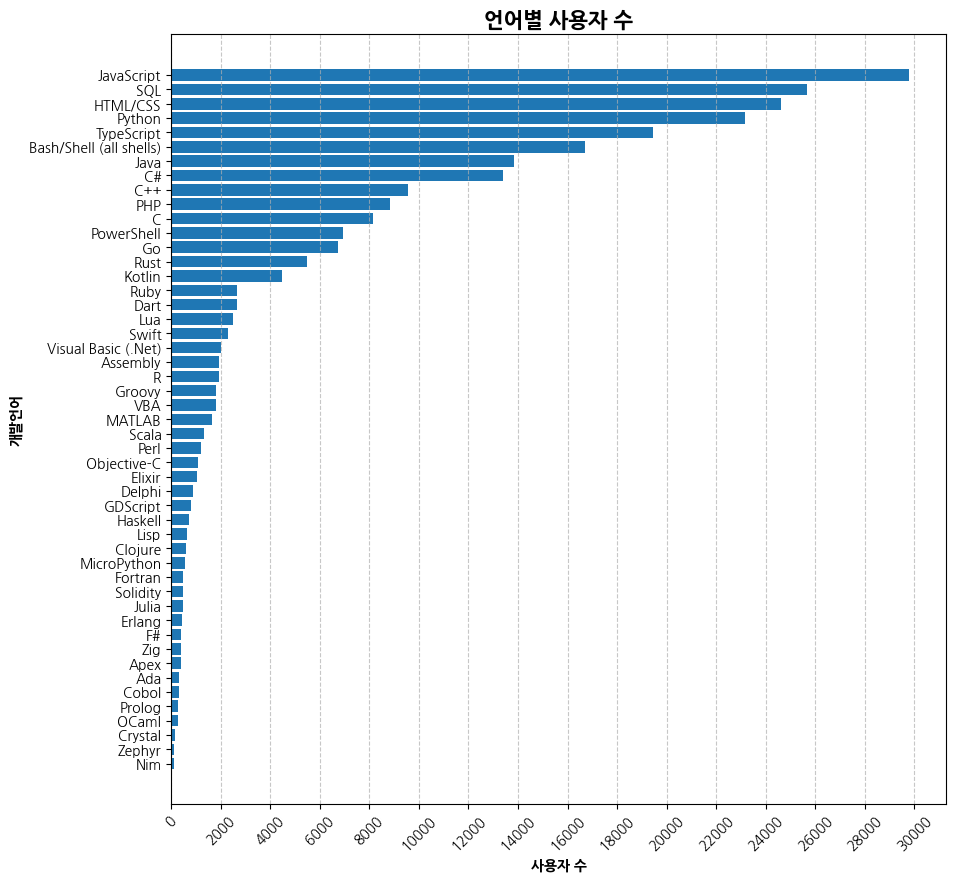

In [ ]:
lang_frequency = lang_df['LanguageHaveWorkedWith'].value_counts(ascending=True)

standard_figsize = (10, 10)
plt.figure(figsize=standard_figsize)

plt.barh(width=lang_frequency.values, y=lang_frequency.index)

plt.title('언어별 사용자 수', fontsize=15, fontweight='bold')
plt.ylabel('개발언어', fontweight='bold')
plt.xlabel('사용자 수', fontweight='bold')
plt.xticks(np.arange(0, lang_frequency.values.max() + 2000, 2000), rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.7) # alpha=1이면 전혀 투명하지 않은 solid 값
plt.show()

### 가장 많이 쓰이는 개발 언어 상위 10개

#### barh - 상위 10개 언어별 사용자 수

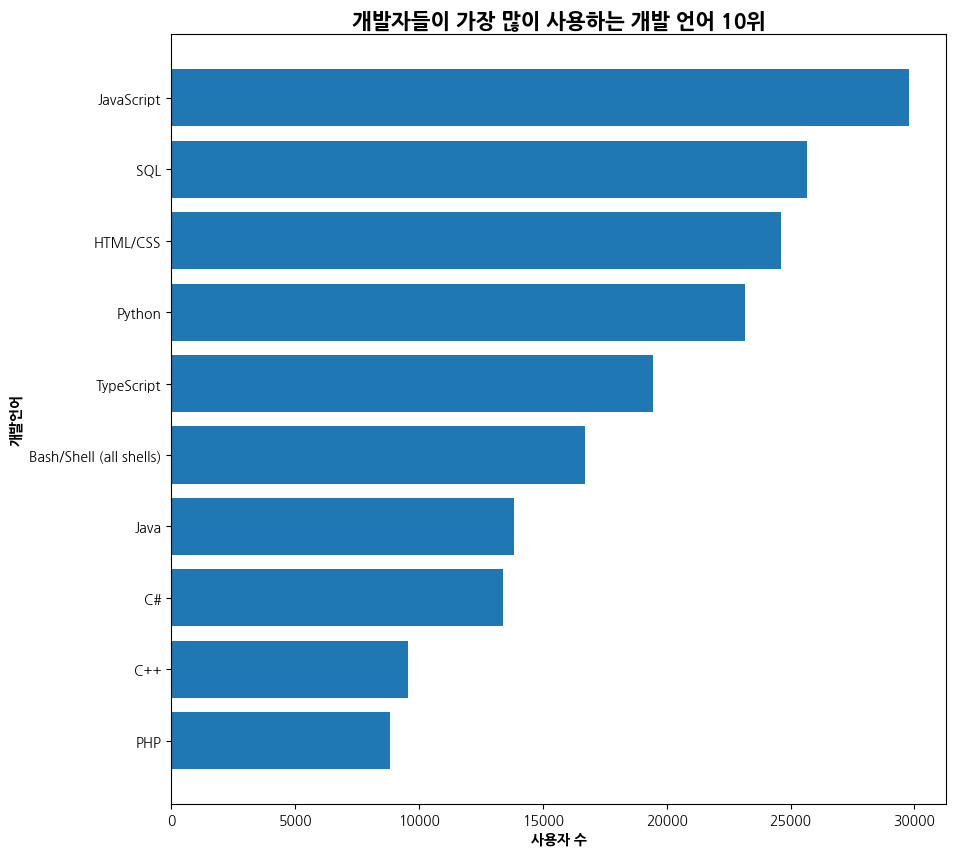

In [360]:
top10_lang = lang_frequency.nlargest(10).sort_values(ascending=True)

plt.figure(figsize = standard_figsize)
plt.barh(width=top10_lang.values, y=top10_lang.index)

plt.title('개발자들이 가장 많이 사용하는 개발 언어 10위', fontsize=15, fontweight='bold')
plt.ylabel('개발언어', fontweight='bold')
plt.xlabel('사용자 수', fontweight='bold')
plt.xticks(np.arange(0, top10_lang.values.max()+5000, 5000))
plt.show()

#### barh - 상위 10개 언어별 응답자 수 비율 정보를 그래프에 추가

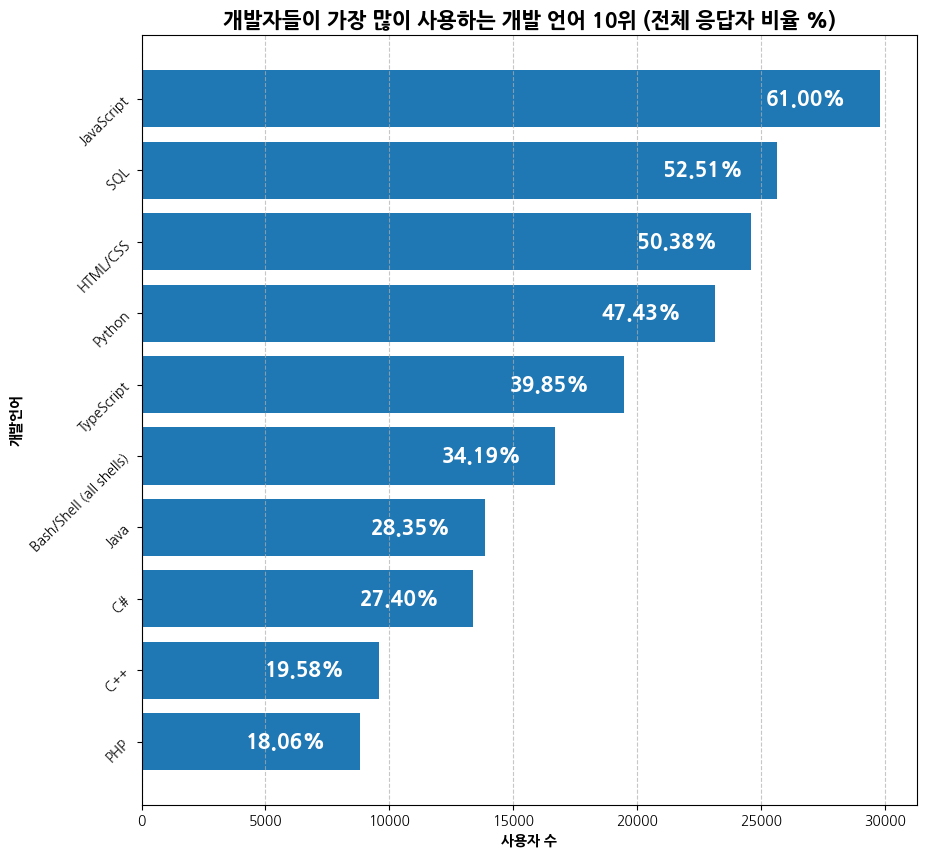

In [373]:
top10_lang = lang_frequency.nlargest(10).sort_values(ascending=True)
total_respondents = lang_df['ResponseId'].nunique() # 총 응답자 수
top10_lang_percentage = (top10_lang / total_respondents) * 100

plt.figure(figsize = standard_figsize)
lang_bars = plt.barh(width=top10_lang.values, y=top10_lang.index)

for bar, percentage in zip(lang_bars, top10_lang_percentage):
    plt.text(x=bar.get_width() - top10_lang.values.max()*0.1,y=bar.get_y() + bar.get_height()/2,s=f'{percentage:.2f}%',
            color='white',fontweight='bold',fontsize=15, va='center', ha='center')

plt.title('개발자들이 가장 많이 사용하는 개발 언어 10위 (전체 응답자 비율 %)', fontsize=15, fontweight='bold')
plt.ylabel('개발언어', fontweight='bold')
plt.xlabel('사용자 수', fontweight='bold')
plt.xticks(np.arange(0, top10_lang.values.max()+5000, 5000))
plt.yticks(rotation=45)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()